# Week 3 Computer Lab {-}


1. Read Week 3 - Sample Short-Answer Questions (5 min)
2. Complete Week 3 Practice Quiz (15 min)
2. Introduce some commonly used Pandas functions
    - `isnull()` Check for missing values . https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html
    - `unique()` Return unique values from a DataFrame. https://pandas.pydata.org/docs/reference/api/pandas.unique.html
    - `nunique()` Count the number of distinct elements in specified axis. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html
    - `value_counts()` Return a Series containing counts of unique values. https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
    - `drop_duplicates()` Return DataFrame with duplicate rows removed. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
    - `loc[]` with multiple conditions. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html



---
---

### Import libraries & Create a small dataset to be used in the tutorial

```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
```



```

df = pd.DataFrame({
    'StudentID': ['S001', 'S002', 'S003', 'S004', 'S005', 'S006', 'S007', 'S008', 'S009'],
    'StudentName': ['Angela', 'Frank', 'Grace', 'Jack', 'Bernadette', 'Alexander', 'Fiona', 'Colin', 'Tom'],
    'PostCode': ['1234', '1234', '2000', np.nan, '2001', np.nan, '2020','2020', '2122'], 
    'CourseCode': ['ACCG001','ACCG001','INFO300','INFO200', 'INFO200', 
                   'BUSA001','BUSA001','AFIN003','ACCG001']})
```



```
df
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'StudentID': ['S001', 'S002', 'S003', 'S004', 'S005', 'S006', 'S007', 'S008', 'S009'],
    'StudentName': ['Angela', 'Frank', 'Grace', 'Jack', 'Bernadette', 'Alexander', 'Fiona', 'Colin', 'Tom'],
    'PostCode': ['1234', '1234', '2000', np.nan, '2001', np.nan, '2020','2020', '2122'], 
    'CourseCode': ['ACCG001','ACCG001','INFO300','INFO200', 'INFO200', 
                   'BUSA001','BUSA001','AFIN003','ACCG001']})

df

,StudentID,StudentName,PostCode,CourseCode
0,S001,Angela,1234,ACCG001
1,S002,Frank,1234,ACCG001
2,S003,Grace,2000,INFO300
3,S004,Jack,NaN,INFO200
4,S005,Bernadette,2001,INFO200
5,S006,Alexander,NaN,BUSA001
6,S007,Fiona,2020,BUSA001
7,S008,Colin,2020,AFIN003
8,S009,Tom,2122,ACCG001


---


### `isnull()`

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html
- Detect missing values for an array-like object.
- This function takes a scalar or array-like object and indicates whether values are missing (NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike).


We will apply `isnull()` to the feature **Postcode**.

Note: 
- To check the number of NA value, we could use `isnull().sum()`.

```
df['PostCode'].isnull() # test each observation for missing value

print(f'There are {df["PostCode"].isnull().sum()} missing values in the column Postcode.') # sum missing values

```

In [4]:
df['PostCode'].isnull() # test each observation for missing value

print(f'There are {df["PostCode"].isnull().sum()} missing values in the column Postcode.') # sum missing values

There are 2 missing values in the column Postcode.


--- 
### `unique()`

- [https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)
- Returns unique values.
- Uniques are returned in the order of appearance. This does NOT sort
- Significantly faster than numpy.unique for long sequences
- Will also include `None` (missing values) as a unique element

Examples
- Lets check unique **CourseCode** and **PostCode**.

```
df['CourseCode'].unique()


df['PostCode'].unique()


type(df['PostCode'].unique())    # check the type of the returned object

```

In [11]:
df['CourseCode'].unique()

array(['ACCG001', 'INFO300', 'INFO200', 'BUSA001', 'AFIN003'],
      dtype=object)

In [8]:
df['PostCode'].unique()

array(['1234', '2000', nan, '2001', '2020', '2122'], dtype=object)

In [10]:
type(df['PostCode'].unique())    # check the type of the returned object

numpy.ndarray

In [16]:
len(df['CourseCode'].unique())

5

--- 
### `nunique()`

- [ https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html]( https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html)
- Count number of distinct elements in specified axis.
- Return Series with number of distinct elements. 
- Option `dropna = False` will count missing values as a unique element

Differences between `unique()` and `nunique()`:
- `unique()` gives the unique value, whereas `nunique()` give the number of unique value.
- `unique()` includes **NA** value, whereas `nunique()` does not take **NA** value into account by default (but see dropna option)


```
df

print(f'Number of unique values in Postcode which does NOT include NA values is {df["PostCode"].nunique()}')

print(f'Number of unique values in Postcode which includes NA values is {df["PostCode"].nunique(dropna=False)}')
```

In [12]:
print(f'Number of unique values in Postcode which does NOT include NA values is {df["PostCode"].nunique()}')

Number of unique values in Postcode which does NOT include NA values is 5


---

### `value_counts()`

- [https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)
- Returns a Series containing `counts` of each unique value
- The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
- Excludes NA values by default.

```
df

df['CourseCode'].value_counts()
```

In [22]:
df

df['CourseCode'].value_counts()

ACCG001    3
INFO200    2
BUSA001    2
INFO300    1
AFIN003    1
Name: CourseCode, dtype: int64


- `value_counts()` could be used to create bar plot, which shows the frequence of each class;
    - There are also many other ways of doing this 

```
# course_freq stores course name and corresponding frequnce
course_freq = df['CourseCode'].value_counts()

# use course_freq to generate a bar plot
ax = course_freq.plot.barh(title='Course Enrollments')
ax.set_xlabel('Frequency')
ax.set_ylabel('Course')
plt.show()
```



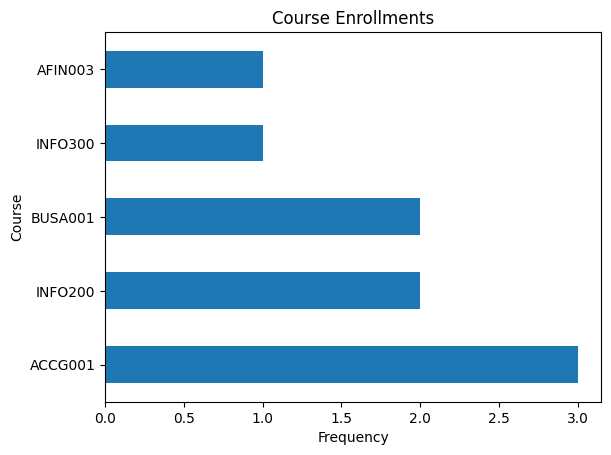

In [23]:
# course_freq stores course name and corresponding frequnce
course_freq = df['CourseCode'].value_counts()

# use course_freq to generate a bar plot
ax = course_freq.plot.barh(title='Course Enrollments')
ax.set_xlabel('Frequency')
ax.set_ylabel('Course')
plt.show()

---
### `drop_duplicates()`

- [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)
- Returns DataFrame with duplicate rows removed
- To remove duplicates on specific column(s), use `subset`
- Must use `inplace = True` to modify the original dataframe
- keep{‘first’, ‘last’, False}, default ‘first’. Determines which duplicates (if any) to keep.
    - first : Drop duplicates except for the first occurrence (**default value**)
    - last : Drop duplicates except for the last occurrence.
    - False : Drop all duplicates.



```
# create a new dataframe with duplicates

df2 = pd.DataFrame({
    'productID':["p01","p02","p03","p04","p01","p02","p05"],
    'Price':[100,250,220,300,100,250,300],
    'productType':['A','A','B','C','A','A','B']
})
df2



df2.drop_duplicates()   # drop rows which have identical values
df2


df2.drop_duplicates(subset='productType')
df2

df2.drop_duplicates(subset='productType', inplace = True)
df2
```

In [24]:
# create a new dataframe with duplicates

df2 = pd.DataFrame({
    'productID':["p01","p02","p03","p04","p01","p02","p05"],
    'Price':[100,250,220,300,100,250,300],
    'productType':['A','A','B','C','A','A','B']
})
df2



df2.drop_duplicates()   # drop rows which have identical values
df2


df2.drop_duplicates(subset='productType')
df2

df2.drop_duplicates(subset='productType', inplace = True)
df2


,productID,Price,productType
0,p01,100,A
2,p03,220,B
3,p04,300,C


---
## `loc[]` with multiple conditions 

- [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)
- Access a group of rows and columns by labels

- By using `loc[]` you can apply multiple conditions. 
    - Make sure you **surround each condition with round brackets**. Not using this will get you incorrect results.
    
    
```
# create dataframes
df = pd.DataFrame({
    'productID':["p01","p02","p03","p04","p05","p06","p07","p08","p09","p10"],
    'Price':[100,250,220,300,190,900,1050,40,30,90],
    'productType':['A','A','B','C','B','A','A','B','A','C'],
    'yearReleased':[2010,2012,2020,2013,2020,2021,2014,2009,2020,2022],
    'cumulativeSales($)':[100000,200000,190000,90000,10000,
                          140000,10000,6000,9000,300000]
})

df
```



1. Select products that price is greater than $100 and released before 2020.

```
df.loc[(df['Price']>100) & (df['yearReleased']<2020)] # '&' refers to 'and'
```

(condition A) & (condition B)

2. Select products that price is less than $100, product type is B, and released before 2020.

```
df.loc[(df['Price']<100) & (df['productType']=='B') & (df['yearReleased']<2020)]
```


3. Select products that either price is less than 100 `or` cumulative sales is less than 100000.

```
df.loc[(df['Price']<100) | (df['cumulativeSales($)']<100000)]
# '|' refers to 'or'
```